<a href="https://colab.research.google.com/github/isabelapt/Bootcamp_Data_Science_Alura/blob/main/Modulo_2/Modulo2Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
# Gastos Hospitalares 2008 - 2021
URL = 'https://raw.githubusercontent.com/isabelapt/Bootcamp_Data_Science_Alura/main/data/A174626189_28_143_208.csv'

In [ ]:
# Lê um arquivo csv e retorna em formato de DataFrame
dados = pd.read_csv(
    URL,
    encoding="ISO-8859-1",
    # skiprows manda pular as linhas iniciais
    skiprows = 3,
    # sep indica qual o caractere utilizado como separador
    sep=";",
    # skipfooter manda pular as linhas finais
    skipfooter=12,
    # thousands indica qual o caractere a ser reconhecido como o separador de milhares nos campos numéricos
    thousands=".",
    # decimal indica qual o caractere a ser reconhecido como o separador decimal nos campos numéricos
    decimal=",",
    engine='python'
)

pd.options.display.float_format = "{:.2f}".format

# Mostra as 5 primeiras linhas do DataFrame
display(dados.head())

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11735462.95,10201985.14,7955139.45,9358460.86,8883298.53,9630340.52,9096438.36,11749490.28,10420414.57,1009293149.05
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,456356147.14
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17786684.95,21522871.13,26002822.25,23189723.50,21844013.34,1940455216.35
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888

In [ ]:
usaveis = dados[colunas_usaveis]
usaveis.set_index("Unidade da Federação", inplace=True)

ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1) # Drop Column Total
ordenado_por_total.index = ordenado_por_total.index.str[3:] # Remove numver from State Names
display(ordenado_por_total.head())

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,244464657.96,...,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304511719.34,288872273.89,297359679.70,251331659.00,272493373.35,306773146.78,367648996.72,349900969.68,354117254.42,345865564.32,335390411.73,327178639.99,350338160.20,344287708.89,397900711.86,454877315.76
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,110963598.17,...,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153901643.72,159280453.89,150237121.46,142897333.08,133416702.94,133514800.21,139943759.22,165759955.94,171048093.95,175439696.53,178279152.74,175340033.60,172724736.54,185988742.67,188754090.58,213257717.93,239592471.25
Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,75660652.68,...,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126966338.94,131587683.74,127099316.24,117905826.73,122357489.56,127010218.52,117317015.92,94604541.30,107506194.76,96981983.22,109720663.59,129529222.48,122702263.26,129647873.97,126859051.02,120037066.76,122122779.12,132622112.72,140541485.50,156153143.38
Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.0

**Análises para o mês mais recente**

In [ ]:
ordenado_por_total = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Abr'

In [ ]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           454.88
Minas Gerais        239.59
Paraná              156.15
Rio Grande do Sul   141.21
Rio de Janeiro      108.76
Name: 2021/Abr, dtype: float64

In [ ]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

In [ ]:
def clean_table_data(table,url):
  # Read Table from URL 
  dados_wiki_list = pd.read_html(url)                                                                                                          
  populacao = dados_wiki_list[0]

  # Extract columns                                                                                                    
  populacao = populacao[['Unidade federativa','População']]

  # Rename columns name
  populacao.rename(columns={'Unidade federativa':'uf', 'População':'populacao'}, inplace=True)

  # Set uf as index
  populacao.set_index("uf", inplace=True)

  # Replace white spaces between the string digits
  populacao['populacao'] = populacao['populacao'].str.replace(' ', '')

  # Cast the string to int
  populacao['populacao'] = populacao['populacao'].astype(int)

  # Join Tables
  unida = populacao.join(table) #união dos dados
    
  return populacao, unida

In [ ]:
URL = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao, populacao_gastos = clean_table_data(gastos_do_mais_recente,URL)
display(populacao)
display(populacao_gastos)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


,populacao,2021/Abr
uf,,
São Paulo,46289333,454.88
Minas Gerais,21292666,239.59
Rio de Janeiro,17366189,108.76
Bahia,14930634,108.98
Paraná,11516840,156.15
Rio Grande do Sul,11422973,141.21
Pernambuco,9616621,95.55
Ceará,9187103,68.65
Pará,8690745,17.19


# Aula 2: Proporcionalidades e Seaborn

In [ ]:
populacao_gastos.iloc[:,-1]

uf
São Paulo             454.88
Minas Gerais          239.59
Rio de Janeiro        108.76
Bahia                 108.98
Paraná                156.15
Rio Grande do Sul     141.21
Pernambuco             95.55
Ceará                  68.65
Pará                   17.19
Santa Catarina         82.17
Maranhão               45.35
Goiás                  58.19
Amazonas               21.84
Espírito Santo         54.24
Paraíba                28.85
Rio Grande do Norte    35.00
Mato Grosso            24.34
Alagoas                26.63
Piauí                  25.48
Distrito Federal       38.41
Mato Grosso do Sul     23.92
Sergipe                14.92
Rondônia               10.42
Tocantins               1.28
Acre                    6.31
Amapá                   3.62
Roraima                 4.86
Name: 2021/Abr, dtype: float64

,populacao,2021/Abr,gastos_2021/Abr,gasto_por_habitante_2021/Abr
uf,,,,
São Paulo,46289333,454.88,454877315.76,9.83
Minas Gerais,21292666,239.59,239592471.25,11.25
Rio de Janeiro,17366189,108.76,108762003.00,6.26
Bahia,14930634,108.98,108984735.91,7.30
Paraná,11516840,156.15,156153143.38,13.56


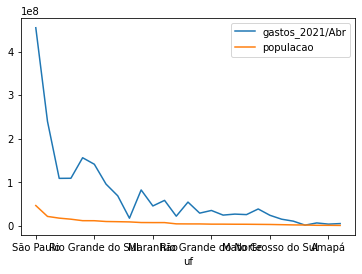

In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, populacao_gastos, "2021/Abr")
display(populacao_gastos.head())
populacao_gastos[["gastos_2021/Abr","populacao",]].plot()

In [ ]:
display(populacao_gastos.loc[["São Paulo","Rio Grande do Sul"]])

,populacao,2021/Abr,gastos_2021/Abr,gasto_por_habitante_2021/Abr
uf,,,,
São Paulo,46289333,454.88,454877315.76,9.83
Rio Grande do Sul,11422973,141.21,141211476.01,12.36


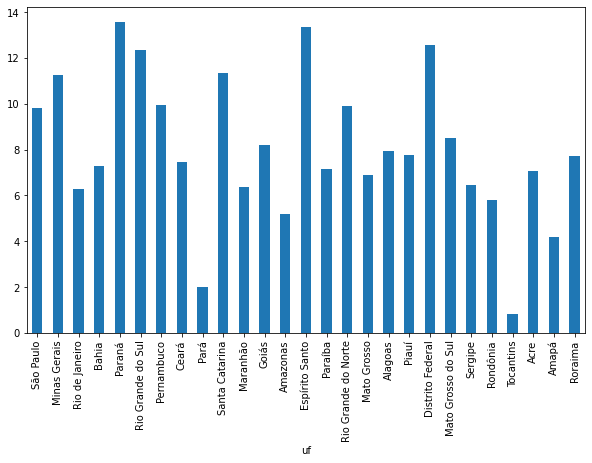

In [ ]:
# The order of indexes are descending in absolute vaues
populacao_gastos["gasto_por_habitante_2021/Abr"].plot(kind="bar",figsize = (10,6))

**The States with greater absolute values in hospital expenses are not the ones with the most per capita hospital expenses. Distrito Federal is the federative unit with the highest medical expenses per capita.**

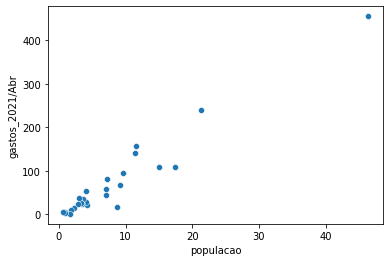

In [ ]:
import seaborn as sns
sns.scatterplot(data=populacao_gastos/ 1000000, x="populacao", y="gastos_2021/Abr")

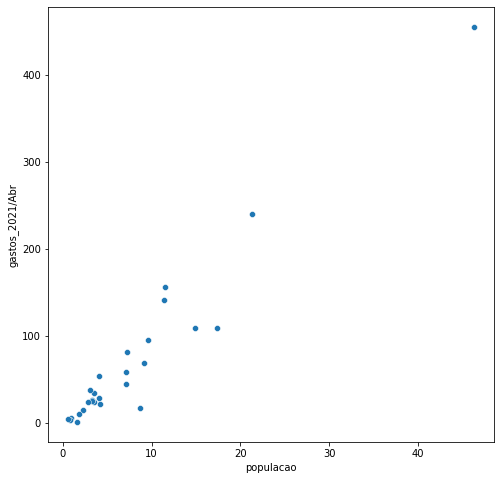

In [ ]:
# Better proportion , but it is not 1x1 yet
plt.figure(figsize=(8,8))
sns.scatterplot(data=populacao_gastos/ 1000000, x="populacao", y="gastos_2021/Abr")

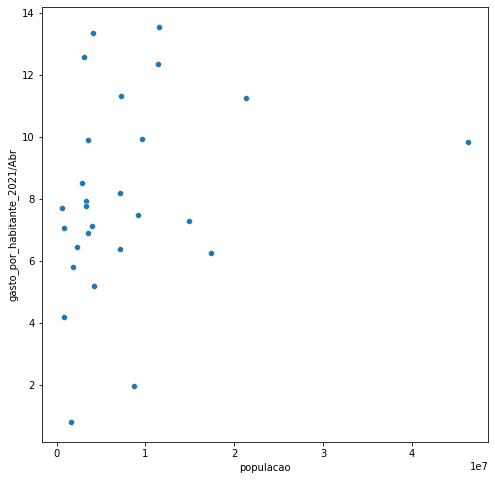

In [ ]:
# Better proportion of fig scale, but it is not 1x1 yet
plt.figure(figsize=(8,8))
sns.scatterplot(data=populacao_gastos, x="populacao", y="gasto_por_habitante_2021/Abr")

## Desafio 01 - Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.


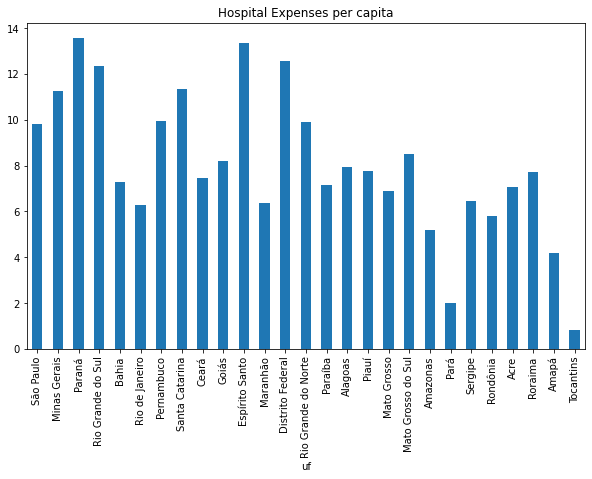

In [ ]:
# Ordered by gastos (2021/Abr)
populacao_gastos_sort_gastos = populacao_gastos.sort_values("gastos_2021/Abr", ascending = False)
populacao_gastos_sort_gastos["gasto_por_habitante_2021/Abr"].plot(kind='bar', figsize = (10,6))

plt.title("Hospital Expenses per capita")
plt.show()

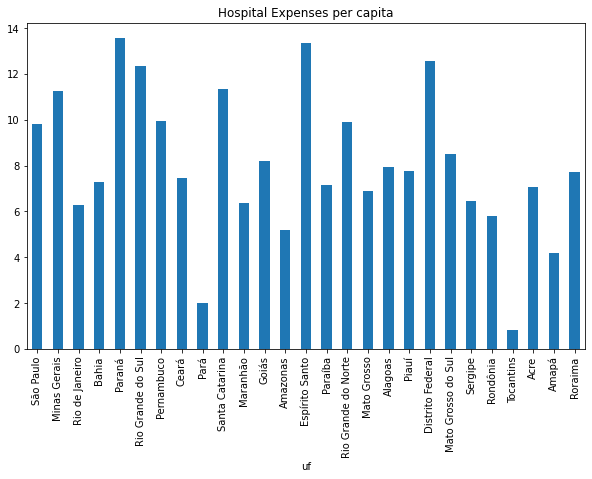

In [ ]:
# Ordered by population estimate 2020
populacao_gastos_sort_populacao = populacao_gastos.sort_values("populacao", ascending = False)
populacao_gastos_sort_populacao["gasto_por_habitante_2021/Abr"].plot(kind='bar', figsize = (10,6))

plt.title("Hospital Expenses per capita")
plt.show()

## Desafio 02 (Super Desafio Gui) - Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.



In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, populacao_gastos, "2021/Mar")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, populacao_gastos, "2021/Fev")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, populacao_gastos, "2021/Jan")
populacao_gastos.head()

,populacao,2021/Abr,gastos_2021/Abr,gasto_por_habitante_2021/Abr,gastos_2021/Mar,gasto_por_habitante_2021/Mar,gastos_2021/Fev,gasto_por_habitante_2021/Fev,gastos_2021/Jan,gasto_por_habitante_2021/Jan
uf,,,,,,,,,,
São Paulo,46289333,454.88,454877315.76,9.83,397900711.86,8.60,344287708.89,7.44,350338160.20,7.57
Minas Gerais,21292666,239.59,239592471.25,11.25,213257717.93,10.02,188754090.58,8.86,185988742.67,8.73
Rio de Janeiro,17366189,108.76,108762003.00,6.26,112871365.80,6.50,92860331.11,5.35,94241880.55,5.43
Bahia,14930634,108.98,108984735.91,7.30,101721524.63,6.81,82222842.09,5.51,79967879.01,5.36
Paraná,11516840,156.15,156153143.38,13.56,140541485.50,12.20,132622112.72,11.52,122122779.12,10.60


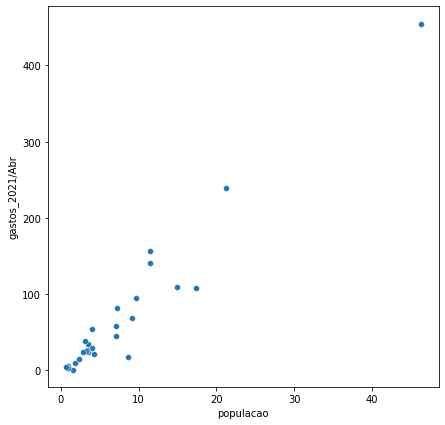

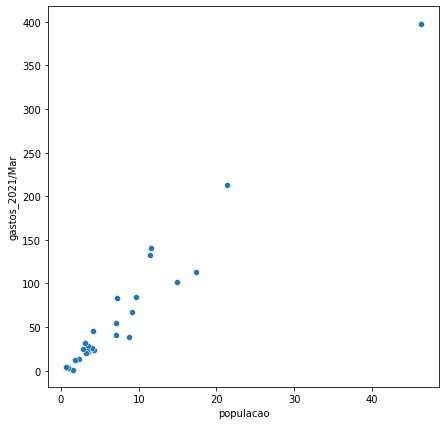

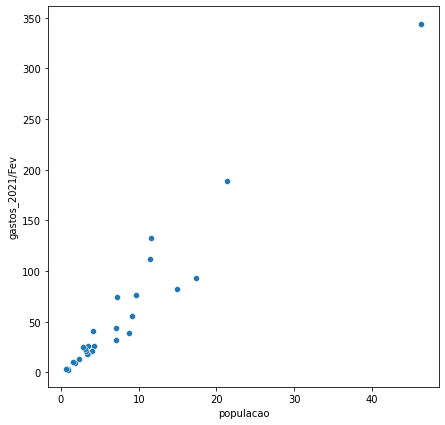

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=populacao_gastos / 1000000, x="populacao", y="gastos_2021/Abr")

plt.figure(figsize=(7,7))
sns.scatterplot(data=populacao_gastos / 1000000, x="populacao", y="gastos_2021/Mar")

plt.figure(figsize=(7,7))
sns.scatterplot(data=populacao_gastos / 1000000, x="populacao", y="gastos_2021/Fev")

**In scatter plots above I tried to find some relationship between hospital expenses by person and population. It can be concluded that they are not proportional to each other. There are cases in which the population is around 10 million but the hospital expenses varies a lot.**

## Desafio 03 (Super Desafio Thiago) - Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

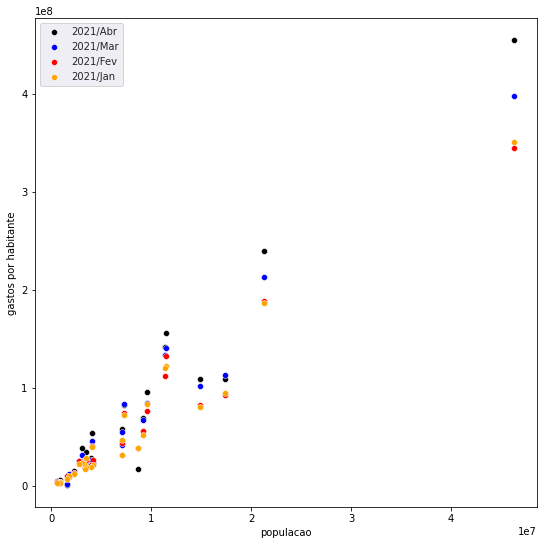

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
sns.set_style("darkgrid")
sns.scatterplot(data=populacao_gastos, x="populacao", y="gastos_2021/Abr", ax=ax, legend=False, color ="black")
sns.scatterplot(data=populacao_gastos, x="populacao", y="gastos_2021/Mar", ax=ax, legend=False, color ="blue")
sns.scatterplot(data=populacao_gastos, x="populacao", y="gastos_2021/Fev", ax=ax,legend=False, color ="red")
sns.scatterplot(data=populacao_gastos, x="populacao", y="gastos_2021/Jan", ax=ax,legend=False, color = "orange")

ax.legend(labels =["2021/Abr","2021/Mar","2021/Fev","2021/Jan"])
ax.set(ylabel = "gastos por habitante")
plt.show()

## Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

Analisando dados de Janeiro de 2021 até Abril de 2021, observa-se uma tendência de crescimento nos gastos por habitante, principalmente para os estados com população maior que 10 milhões de habitantes.